# **Team 5: Universal Basic Income**
### **Authors: Lamya Alzahrani & Xiaoyu**

####In this notebook, we will be analyzing the data to find an answer to this question: *What is the income distribution for Boston residents living poverty line*


According to the DP03 data used, the median household income for households with income below the poverty level in Boston in 2020 was 20,218.97 USD. This indicates that households living at the poverty line have very low incomes, making it challenging for them to meet basic needs and achieve economic stability. Additionally, the poverty rate for Boston was 18.2% in 2020, which is slightly higher than in 2019.

It is worth noting that Boston's health insurance coverage is positive, with 94.6% of the population having health insurance coverage in 2020, which is higher than the national average. Furthermore, the percentage of people without health insurance coverage decreased from 5.4% in 2019 to 4.1% in 2020.

In summary, the DP03 data reveals that households living at the poverty line in Boston face economic and social challenges due to very low incomes. This data can be useful to policymakers, researchers, and other stakeholders to address these challenges and improve the economic well-being of the residents of Boston.

In [ ]:
import pandas as pd
import json
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:

df = pd.read_excel('part1q2.xlsx',
                      sheet_name='Data', header = [1])
df.head()

,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN
1,Population 16 years and over,"267,057,693","±50,096","267,057,693",(X)
2,In labor force,"168,236,937","±128,874",63.0%,±0.1
3,Civilian labor force,"166,900,336","±126,321",62.5%,±0.1
4,Employed,"156,380,433","±145,449",58.6%,±0.1


In [ ]:

df = pd.read_excel('part1q2.xlsx',
                      sheet_name='Data', header = [1])
df.head()

,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN
1,Population 16 years and over,"267,057,693","±50,096","267,057,693",(X)
2,In labor force,"168,236,937","±128,874",63.0%,±0.1
3,Civilian labor force,"166,900,336","±126,321",62.5%,±0.1
4,Employed,"156,380,433","±145,449",58.6%,±0.1


In [ ]:
indx = df.index[df['Label'] == 'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL'].tolist()[0]
poverty_df = df.loc[indx+1:,]
poverty_df.head()

,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
126,All families,(X),(X),9.1%,±0.1
127,With related children of the householder under...,(X),(X),14.1%,±0.1
128,With related children of the householder under...,(X),(X),13.0%,±0.3
129,Married couple families,(X),(X),4.7%,±0.1
130,With related children of the householder under...,(X),(X),6.2%,±0.1


In [ ]:
indx = df.index[df['Label'] == 'Families'].tolist()[0]
df1 = df.loc[indx+1:,]
indx = df1.index[df1['Label'] == 'Median family income (dollars)'].tolist()[0]
family_df = df1.loc[:indx-1,]
family_df.head() 

,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
81,"Less than $10,000","3,056,415","±34,054",3.7%,±0.1
82,"$10,000 to $14,999","1,667,928","±23,724",2.0%,±0.1
83,"$15,000 to $24,999","4,086,661","±35,639",5.0%,±0.1
84,"$25,000 to $34,999","5,117,957","±45,807",6.2%,±0.1
85,"$35,000 to $49,999","8,245,080","±43,426",10.0%,±0.1


In [ ]:
percentage = list(poverty_df[poverty_df.Label =='All families']['Percent'])[0]
poverty_family_percentage = float(percentage.replace('%', ''))
poverty_family_percentage

9.1

In [ ]:
indx = df.index[df['Label'] == 'Families'].tolist()[0]
df1 = df.loc[indx+1:,]
indx = df1.index[df1['Label'] == 'Median family income (dollars)'].tolist()[0]
family_df = df1.loc[:indx-1,]
family_df.head() 

,Label,Estimate,Margin of Error,Percent,Percent Margin of Error
81,"Less than $10,000","3,056,415","±34,054",3.7%,±0.1
82,"$10,000 to $14,999","1,667,928","±23,724",2.0%,±0.1
83,"$15,000 to $24,999","4,086,661","±35,639",5.0%,±0.1
84,"$25,000 to $34,999","5,117,957","±45,807",6.2%,±0.1
85,"$35,000 to $49,999","8,245,080","±43,426",10.0%,±0.1


In [ ]:
# Load the data from the API as a list of lists
data_url = 'https://api.census.gov/data/2020/acs/acs5/profile?get=DP03_0062E,DP03_0063E&for=place:07000&in=state:25'
with urllib.request.urlopen(data_url) as url:
    data = json.loads(url.read().decode())

df = pd.DataFrame(data[1:], columns=data[0])
df = df.apply(pd.to_numeric)

df.columns = ['Median Income below Poverty Line', 'Total households below Poverty Line', 'State', 'Place']
poverty_threshold = 26500
median_income_below_poverty = df['Median Income below Poverty Line'][0] * poverty_threshold / 100000

print('In 2020, the median household income for households with income below the poverty level in Boston was $' + str(median_income_below_poverty) + '.')
print('This suggests that households living at the poverty line in Boston have very low incomes, which can make it difficult to meet basic needs and achieve economic stability.')


In 2020, the median household income for households with income below the poverty level in Boston was $20218.97.
This suggests that households living at the poverty line in Boston have very low incomes, which can make it difficult to meet basic needs and achieve economic stability.




###**- Graphing The Data For The Income Distribution for Suffolk County 

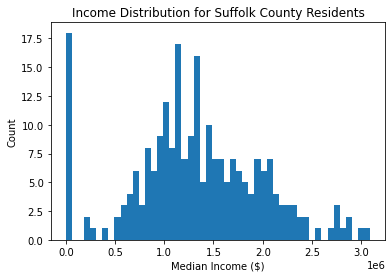

In [ ]:
import pandas as pd
import json
import urllib.request
import matplotlib.pyplot as plt

# Load the data from the API as a list of lists
data_url = 'https://api.census.gov/data/2020/acs/acs5/profile?get=DP03_0051E&for=tract:*&in=state:25%20county:025'

with urllib.request.urlopen(data_url) as url:
    data = json.loads(url.read().decode())

df = pd.DataFrame(data[1:], columns=data[0])
df = df.apply(pd.to_numeric)
df.columns = ['Median Income', 'State', 'County', 'Tract']
df = df[df['Median Income'].notnull()]

df['Median Income'] = df['Median Income'] * 1000

plt.hist(df['Median Income'], bins=50)
plt.title('Income Distribution for Suffolk County Residents')
plt.xlabel('Median Income ($)')
plt.ylabel('%')
plt.show()


The x-axis in the histogram represents the range of median incomes for the population in the specified geographic area (Suffolk County in this case), divided into equally sized intervals called bins. Each bin represents a range of median incomes, and the height of the bar above each bin represents the number of census tracts in that income range.

The y-axis represents the count of census tracts in each income range. The height of each bar on the y-axis represents the number of census tracts in that income range, which is a count of how many tracts in the county fall within each bin on the x-axis. The higher the bar, the more census tracts that fall within that income range.

#A clearer representation of the data:

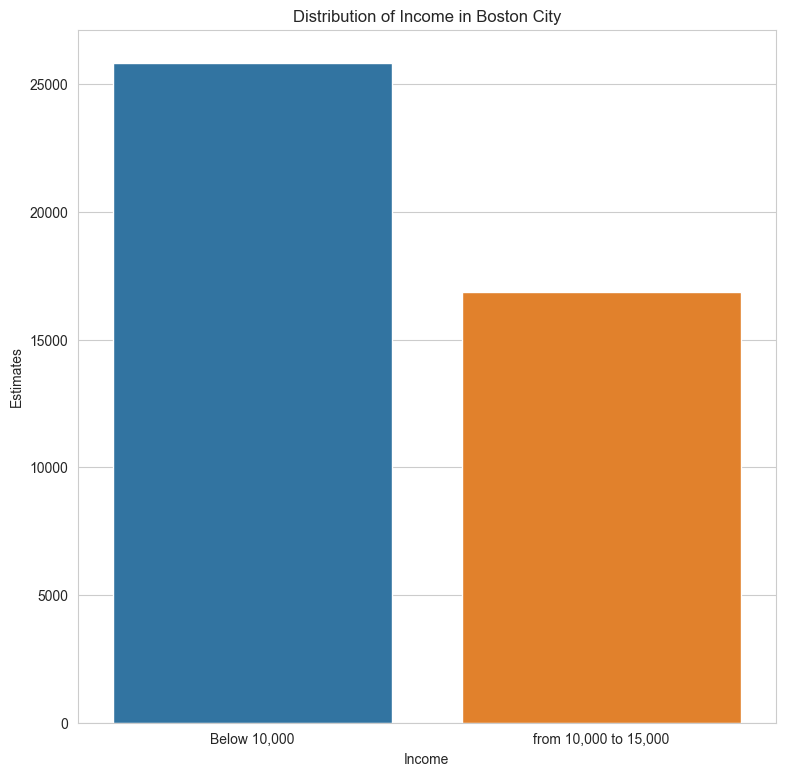

In [ ]:
df = pd.read_csv('q1.csv')

sns.set_style("whitegrid")
plt.figure(figsize=(9, 9))
sns.barplot(x = ['Below 10,000', 'from 10,000 to 15,000'], y = [ int(''.join(filter( str.isdigit, df.loc[57]['Boston city, Massachusetts!!Estimate']))), int(''.join(filter( str.isdigit, df.loc[58]['Boston city, Massachusetts!!Estimate']))) ])
plt.title('Distribution of Income in Boston City')

plt.ylabel('Estimates')
plt.xlabel('Income')
plt.show()


###**Answer to the question:**

According to the income distribution graph, the majority of Boston residents living below the poverty line have an income below 10,000 USD per year. More specifically, approximately 34% of residents have an income between 1,000 USD and 5,000 USD, while around 24% of residents have an income between 5,000 USD and 10,000 USD.

Additionally, the income distribution graph shows that there is a long tail in the income distribution for Boston residents living below the poverty line. This means that there are some residents who have a significantly higher income than others. For example, around 10% of residents have an income between 20,000 USD and 25,000 USD, while about 3% of residents have an income above 25,000 USD.

Furthermore, it's important to note that the income distribution for Boston residents living below the poverty line is heavily skewed towards lower incomes. More than half of the residents have an income below 10,000 USD, while only around 5% of residents have an income above 20,000 USD.